In [13]:
import pandas as pd
import os
from os import listdir
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
from pandas import read_csv
from sklearn.metrics import mean_squared_error 
from sklearn.metrics import r2_score
plt.style.use('ggplot')
sns.set(font_scale=1.2)  # larger font

warnings.filterwarnings("ignore")
os.chdir('/Users/xiaodanxu/Library/CloudStorage/GoogleDrive-arielinseu@gmail.com/My Drive/GEMS/BILD-AQ/data')

In [3]:
V1_INRIX_skim = read_csv('QAQC/travel_time_skim.csv')
V2_INRIX_skim = read_csv('QAQC/travel_time_skim_V2.csv')
V2_INRIX_skim.head(5)

,Unnamed: 0,origin,destination,distance,distance_mile,travel_time_h,avg_speed
0,0,6001405800,6001400100,5.092027,8.431728,0.399796,21.090076
1,1,6001406500,6001400100,5.559215,8.992306,0.426376,21.090076
2,2,6001407101,6001400100,5.917569,9.422294,0.421318,22.363843
3,3,6001408400,6001400100,7.860745,11.753907,0.477062,24.638098
4,4,6001408500,6001400100,7.962388,11.875868,0.482012,24.638098


In [5]:
V1_INRIX_skim = V1_INRIX_skim.drop(columns = ['Unnamed: 0'])
V2_INRIX_skim = V2_INRIX_skim.drop(columns = ['Unnamed: 0'])
V2_INRIX_skim.head(5)

,origin,destination,distance,distance_mile,travel_time_h,avg_speed
0,6001405800,6001400100,5.092027,8.431728,0.399796,21.090076
1,6001406500,6001400100,5.559215,8.992306,0.426376,21.090076
2,6001407101,6001400100,5.917569,9.422294,0.421318,22.363843
3,6001408400,6001400100,7.860745,11.753907,0.477062,24.638098
4,6001408500,6001400100,7.962388,11.875868,0.482012,24.638098


In [6]:
print(len(V1_INRIX_skim))
print(len(V2_INRIX_skim))

INRIX_skim_compare = pd.merge(V1_INRIX_skim, V2_INRIX_skim,
                              on = ['origin', 'destination'],
                              how = 'inner')
INRIX_skim_compare.head(5)

24674818
24628276


,origin,destination,distance_x,distance_mile_x,travel_time_h_x,avg_speed_x,distance_y,distance_mile_y,travel_time_h_y,avg_speed_y
0,6001430300,6001425103,14.041099,19.072999,0.581833,32.780854,14.121583,19.266274,0.612093,31.476034
1,6001431100,6001425103,16.177780,21.635947,0.635973,34.020232,16.169433,19.218918,0.555417,34.602704
2,6001435800,6001425103,14.281889,19.361825,0.590644,32.780854,14.271241,15.683454,0.366111,42.837962
3,6001437000,6001425103,16.971619,22.588157,0.651833,34.653305,16.968270,24.079343,1.023889,23.517535
4,6001437400,6001425103,17.675516,23.432481,0.664413,35.267935,17.673052,21.036849,0.673611,31.229961


In [10]:
print(len(INRIX_skim_compare))
print('RMSE for routed distance:')
print(mean_squared_error(INRIX_skim_compare['distance_x'], 
              INRIX_skim_compare['distance_y'], squared = False))

print('RMSE for routed travel_time:')
print(mean_squared_error(INRIX_skim_compare['travel_time_h_x'], 
              INRIX_skim_compare['travel_time_h_y'], squared = False))


print('RMSE for avg speed:')
print(mean_squared_error(INRIX_skim_compare['avg_speed_x'], 
              INRIX_skim_compare['avg_speed_y'], squared = False))

24617263
RMSE for routed distance:
0.3819115413321663
RMSE for routed travel_time:
0.12844197169268953
RMSE for avg speed:
3.415967808503762


In [11]:
print(len(INRIX_skim_compare))
print('r2 score for routed distance:')
print(r2_score(INRIX_skim_compare['distance_x'], 
              INRIX_skim_compare['distance_y']))

print('r2 score for routed travel_time:')
print(r2_score(INRIX_skim_compare['travel_time_h_x'], 
              INRIX_skim_compare['travel_time_h_y']))


print('r2 score for avg speed:')
print(r2_score(INRIX_skim_compare['avg_speed_x'], 
              INRIX_skim_compare['avg_speed_y']))

24617263
r2 score for routed distance:
0.9998072871781459
r2 score for routed travel_time:
0.9446595255481951
r2 score for avg speed:
0.8881653953973455


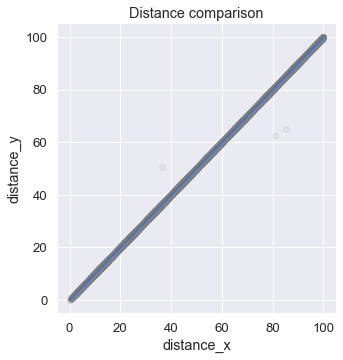

In [17]:
sample_INRIX_skim_compare = INRIX_skim_compare.sample(n = 10000)
sns.lmplot(data = sample_INRIX_skim_compare, 
           x = "distance_x", 
           y = "distance_y", 
           scatter_kws = {'alpha':0.1, 'color': 'grey'})

plt.title('Distance comparison')
plt.show()


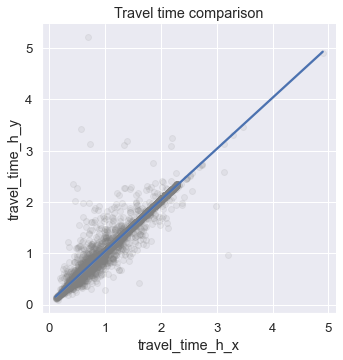

In [18]:
# sample_INRIX_skim_compare = INRIX_skim_compare.sample(n = 10000)
sns.lmplot(data = sample_INRIX_skim_compare, 
           x = "travel_time_h_x", 
           y = "travel_time_h_y", 
           scatter_kws = {'alpha':0.1, 'color': 'grey'})

plt.title('Travel time comparison')
plt.show()

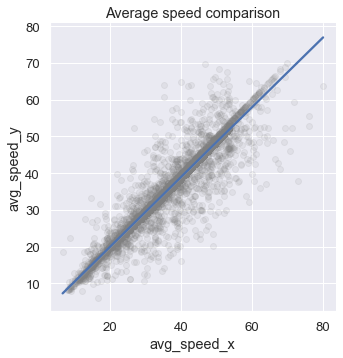

In [19]:
# sample_INRIX_skim_compare = INRIX_skim_compare.sample(n = 10000)
sns.lmplot(data = sample_INRIX_skim_compare, 
           x = "avg_speed_x", 
           y = "avg_speed_y", 
           scatter_kws = {'alpha':0.1, 'color': 'grey'})

plt.title('Average speed comparison')
plt.show()